<a href="https://colab.research.google.com/github/LeratoMatlala1/Project2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car Insurance Data**

**Source**: Kaggle

**Description of data:**
      
  This dataset represents annual car insurance data shared by a company, providing insights into real customer behaviors. The dataset includes 19 features, 18 of which are derived from practical world scenarios and logged by the company, and 10000 observations. The outcome column indicates whether a customer has claimed from insurance, with a value of 1 indicating a claim and 0 indicating no claim.

   Each row contains information about a specific person, including their age group, gender, education level, socioeconomic status, various numeric attributes, and details related to their interaction with car insurance, such as claim history and vehicle type.

   In this dataset, where the outcome column indicates whether a customer has claimed their car insurance (with values of 1 for claimed and 0 for not claimed), it is a classification problem. The task is to classify customers into two categories: those who have made an insurance claim and those who haven't.

##Data Load

In [49]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [50]:
#import the data
CI_path = '/content/drive/MyDrive/Coding Dojo/Machine Learning/Project/Car_Insurance_Claim.csv'
CI_df = pd.read_csv(CI_path)

pd.set_option('display.max_column', None)
CI_df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [51]:
CI_df.shape

(10000, 19)

## Initial Inspection

In [52]:
#check data types
CI_df.dtypes

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

## Data Cleaning

### Removing Unnecessary Columns

We are removing the "ID" and "POSTAL_CODE" columns as they are not necessary for the classification task and do not provide meaningful information for the model. This will simplify the dataset and improve the efficiency of our classification algorithm.


In [53]:
# remove unnecessary columns
CI_df.drop(columns=['ID','POSTAL_CODE'], inplace=True)
CI_df.columns

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

### Fixing Inconsistent Categories

Fixing inconsistent categories in the dataset to ensure data uniformity and accuracy. Inconsistent categories can arise due to various reasons, such as data entry errors, variations in naming conventions, or changes in category definitions over time.


In [54]:
CatColumns = CI_df.select_dtypes(object).columns
for i in CatColumns:
    print(f'Value counts for {i}')
    print(CI_df[i].value_counts())
    print('\n')

Value counts for AGE
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: AGE, dtype: int64


Value counts for GENDER
female    5010
male      4990
Name: GENDER, dtype: int64


Value counts for RACE
majority    9012
minority     988
Name: RACE, dtype: int64


Value counts for DRIVING_EXPERIENCE
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64


Value counts for EDUCATION
high school    4157
university     3928
none           1915
Name: EDUCATION, dtype: int64


Value counts for INCOME
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: INCOME, dtype: int64


Value counts for VEHICLE_YEAR
before 2015    6967
after 2015     3033
Name: VEHICLE_YEAR, dtype: int64


Value counts for VEHICLE_TYPE
sedan         9523
sports car     477
Name: VEHICLE_TYPE, dtype: int64




There are no clear and glaring inconsistencies or issues with the category labels. The categories seem well-defined and consistent within each variable.

### Check Outliers

In [55]:
CI_df.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9018.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.515813,0.697000,0.498200,0.688800,11697.003207,1.482900,0.23920,1.056300,0.313300
std,0.137688,0.459578,0.500022,0.463008,2818.434528,2.241966,0.55499,1.652454,0.463858
min,0.053358,0.000000,0.000000,0.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,0.417191,0.000000,0.000000,0.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,0.525033,1.000000,0.000000,1.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,0.618312,1.000000,1.000000,1.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


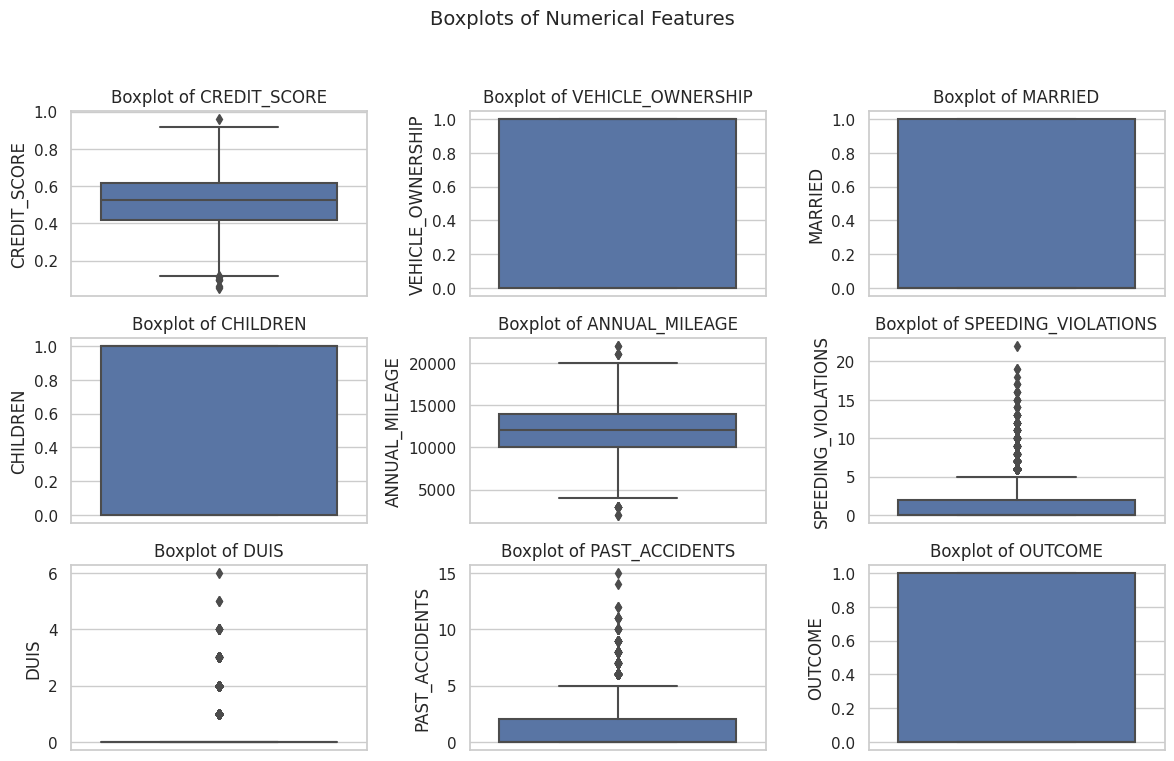

In [56]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
numerical_features = CI_df.select_dtypes(include=['number'])
# Plotting boxplots for each numerical feature on its own subplot using Seaborn
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.boxplot(data=CI_df, y=feature, ax=axes[row, col])
    axes[row, col].set_title(f"Boxplot of {feature}")

plt.suptitle("Boxplots of Numerical Features", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);


- There are possible outliers in Annual Mileage. The minimum value is 2000, and the maximum value is 22000. This range is relatively large, which could indicate outliers.
- The maximum value in Speeding Violations is 22, which is substantially higher than the third quartile (Q3) value of 2. This indicates the presence of potential outliers
- The maximum value in DUIS is 6, significantly higher than the third quartile (Q3) value of 0. This also suggests the presence of potential outliers.
- The maximum value IN Past Accidents is 15, much higher than the third quartile (Q3) value of 2, indicating potential outliers.

### Removing Unnecessary Rows

Removing duplicate rows to ensure data integrity and prevent bias in our analysis. Duplicate rows can skew statistical measures and machine learning models by giving undue importance to certain data points. By eliminating duplicates, we maintain a cleaner and more representative dataset for our analysis.


In [57]:
#Check if there are there duplicates
CI_df.duplicated().sum()

20

In [58]:
# Remove duplicates
CI_df = CI_df.drop_duplicates()
CI_df.duplicated().sum()

0

### Handling Missing Values

In [59]:
#Make a copy of the dataframe that will be used for classification
CI_df_ml = CI_df.copy()
CI_df_ml.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,12000.0,sedan,2,0,1,1.0


Handling missing values to ensure the completeness and accuracy of our data.
Missing values can introduce bias and lead to incorrect conclusions in our analysis. We are addressing them by either imputing them with appropriate values or by excluding rows or columns with excessive missing data, depending on the nature and significance of the missing values for our specific analysis.


In [60]:
#Identify missing values
CI_df.isna().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           962
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
ANNUAL_MILEAGE         952
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

Missing values in Credit Score could imply that the person is young or has not yet built up a credit score. Therefore it is safe to fill these missing values with zeros.

Missing values in Annual Mileage Some could be due to incomplete data entry or administrative errors. In such cases, we will impute missing values with the mean annual mileage for records with similar characteristics (e.g., the same vehicle type and vehicle year).

Missing values will be handled in the

In [61]:
# Impute missing 'CREDIT_SCORE' with zero for policies with missing values
CI_df['CREDIT_SCORE'].fillna(0, inplace=True)

<ipython-input-61-e8f51e58246e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CI_df['CREDIT_SCORE'].fillna(0, inplace=True)


In [62]:
# Impute missing 'ANNUAL_MILEAGE' with mean based on similar policies
CI_df['ANNUAL_MILEAGE'].fillna(CI_df.groupby(['VEHICLE_TYPE', 'VEHICLE_YEAR'])['ANNUAL_MILEAGE'].transform('mean'), inplace=True)
CI_df.isna().sum()

<ipython-input-62-b1484e134f74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CI_df['ANNUAL_MILEAGE'].fillna(CI_df.groupby(['VEHICLE_TYPE', 'VEHICLE_YEAR'])['ANNUAL_MILEAGE'].transform('mean'), inplace=True)


AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

##EDA

### Univariate Analysis


Univariate analysis provides essential insights into the nature of the data, which serve as a foundation for further exploration. It involves examining and analyzing each individual variable separately to gain insights into their characteristics and distributions

In [63]:
#Create a variable for all categorical features features
Categorical_features = CI_df.select_dtypes(include=['object']).columns
Categorical_features

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object')

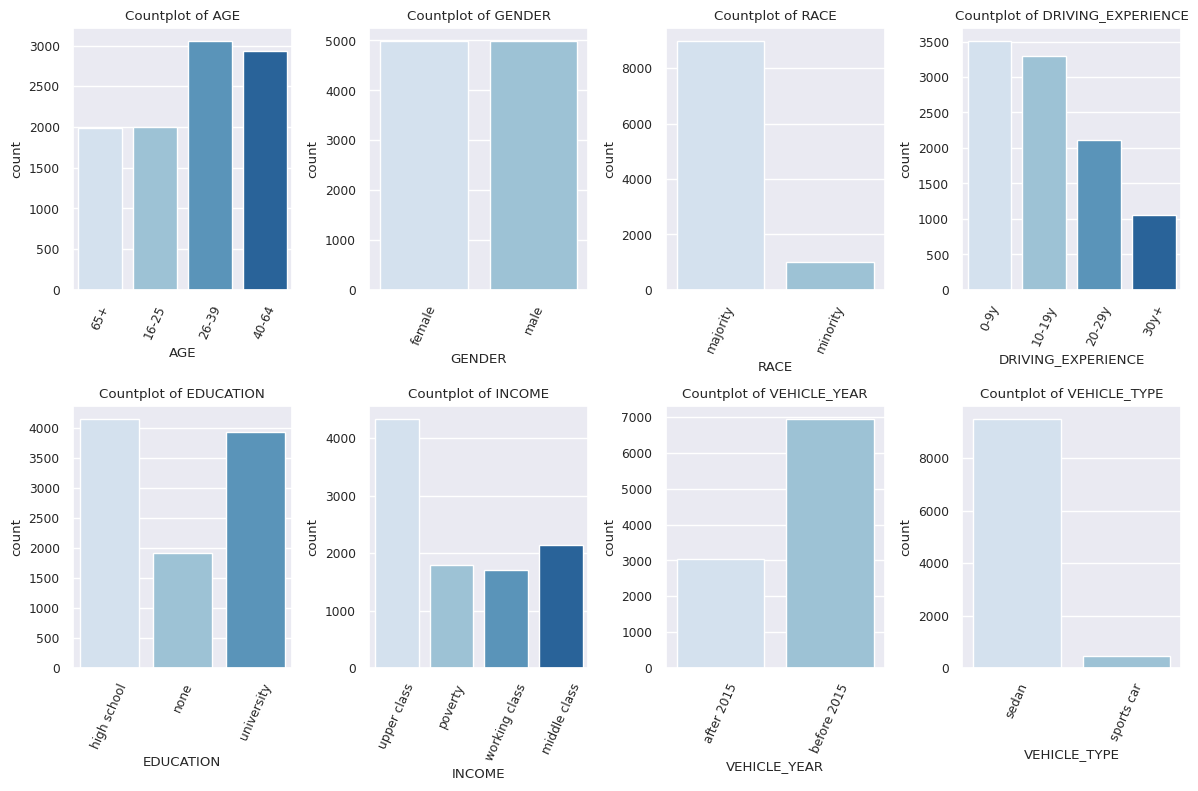

In [64]:
# Define a custom color palette
custom_palette = sns.color_palette("Blues", n_colors=4)

sns.set(font_scale=0.8)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))
for i, feature in enumerate(Categorical_features):
    row = i // 4
    col = i % 4
    sns.countplot(data=CI_df, x=feature, ax=axes[row, col], palette=custom_palette)
    axes[row, col].set_title(f"Countplot of {feature}")
    axes[row, col].tick_params(axis='x', rotation=66)

plt.tight_layout()
plt.show()

From the above we can note that:

- The majority of customers fall into the "26-39" and "40-64" age groups, with similar counts.
- There is a roughly equal distribution between "16-25" and "65+" age groups.
- The dataset is nearly balanced in terms of gender, with slightly more females (4998) than males (4982).
- The majority of customers belong to the "majority" race category, significantly outnumbering the "minority" category.
- The majority of vehicles are categorized as "before 2015," with significantly more customers falling into this category compared to "after 2015."

In [65]:
#Create a variable for all numerical features
numerical_features = CI_df.select_dtypes(include=['int64', 'float64']).columns
numerical_features

Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS',
       'OUTCOME'],
      dtype='object')

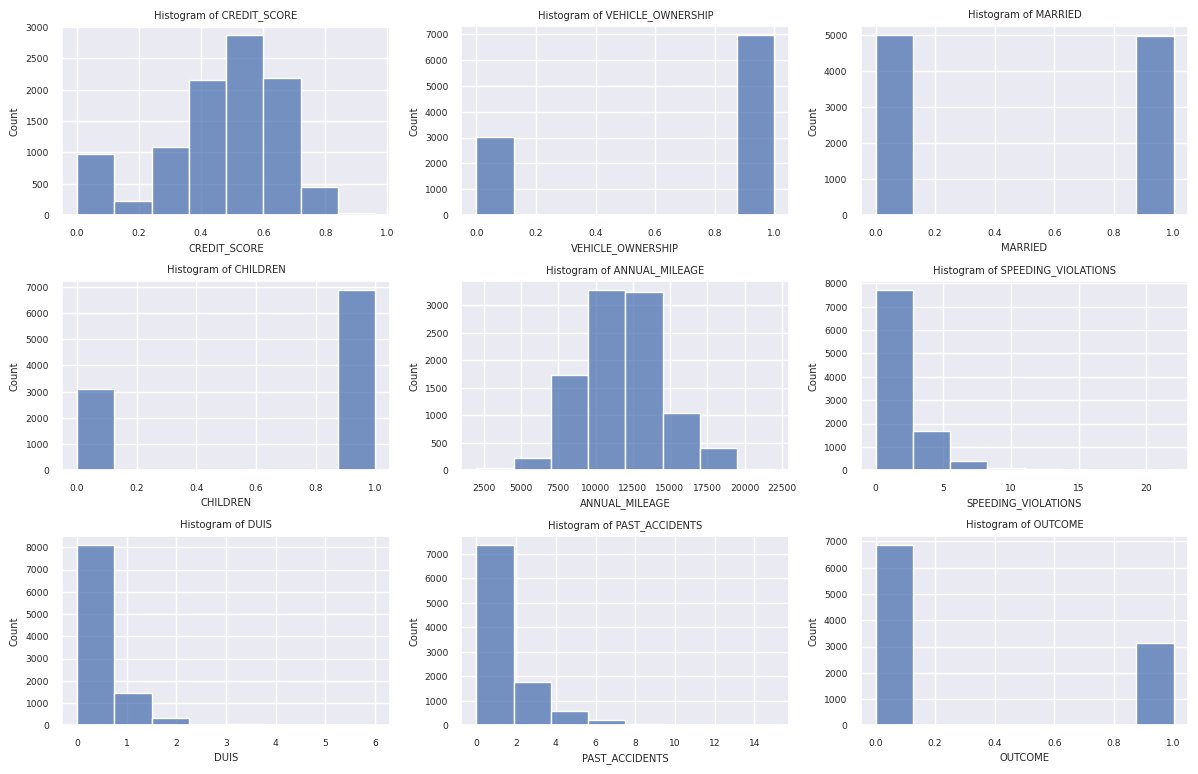

In [66]:
sns.set(font_scale=0.6)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.histplot(data=CI_df, x=feature, bins=8, ax=axes[row, col])
    axes[row, col].set_title(f"Histogram of {feature}")
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

From the above, we can note that:

- The majority of customers (6964) own a vehicle, while a smaller portion (3016) do not own a vehicle.
- The dataset is almost evenly split between married (4980) and unmarried (5000) customers.
- Specific mileage values like 11,000, 12,000, and 13,000 appear more frequently in the data.
- There are 6862 customers with an outcome of 0 (not claimed) and 3118 policyholders with an outcome of 1 (claimed).

### Multivariate Analysis

Unlike univariate analysis, which focuses on a single variable at a time, multivariate analysis considers the interactions and dependencies between two or more variables. Multivariate analysis helps identify patterns, trends, and associations among variables.

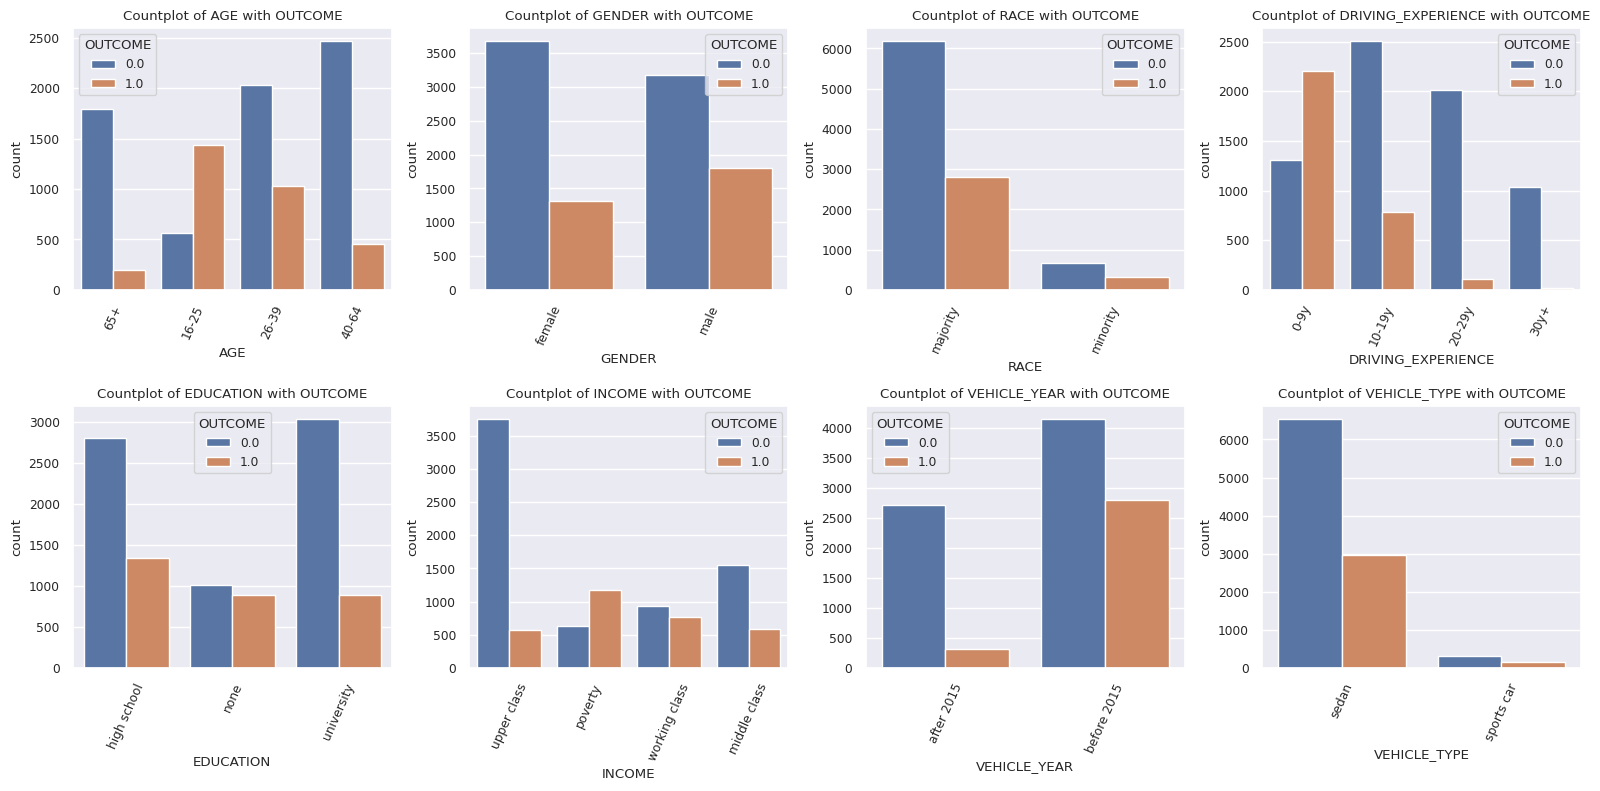

In [67]:
sns.set(font_scale=0.8)

nrows = 2
ncols = 4

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

for i, feature in enumerate(Categorical_features):
    row = i // ncols
    col = i % ncols
    sns.countplot(data=CI_df, hue='OUTCOME', x=feature, ax=axes[row, col])
    axes[row, col].set_title(f"Countplot of {feature} with OUTCOME")
    axes[row, col].tick_params(axis='x', rotation=66)

# Remove empty subplots
for i in range(len(Categorical_features), nrows * ncols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


<ipython-input-68-90ff87216fd1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = CI_df.corr()


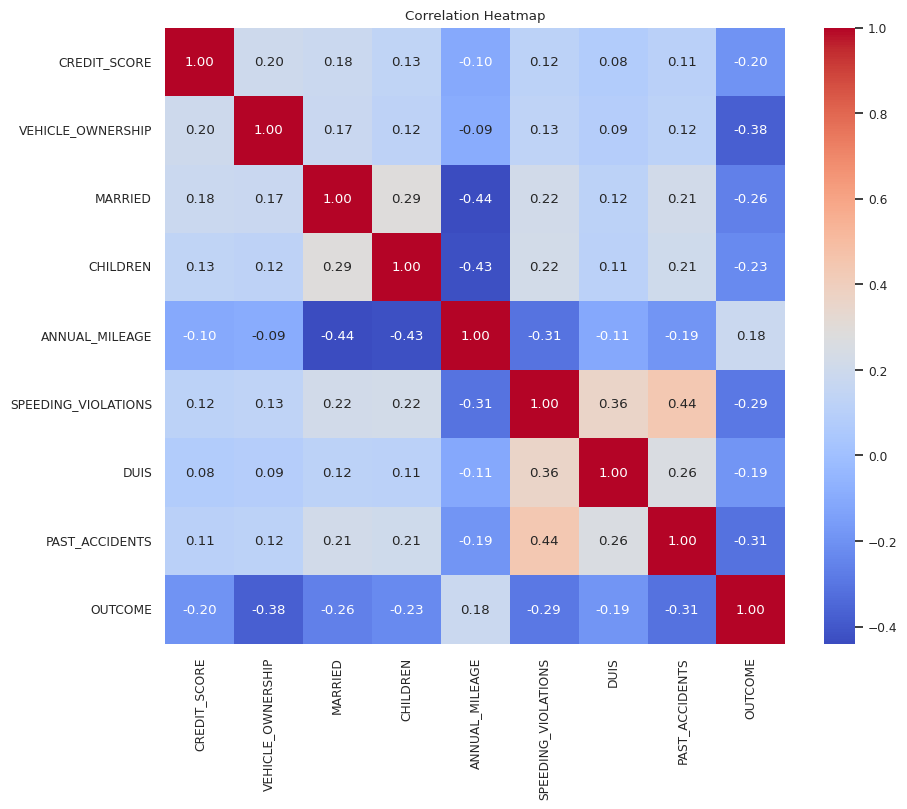

In [68]:
correlation_matrix = CI_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Some of the Key Insights from the above visuals are:

- The negative correlation (-0.2) between credit score and insurance claims suggests that individuals with higher credit scores are less likely to file insurance claims.
- The negative correlation (-0.26) between marital status and insurance claims suggests that married individuals are less likely to make insurance claims
- The positive correlation (0.18) between annual mileage and insurance claims indicates that individuals who drive more miles are slightly more likely to make insurance claims. Higher mileage might lead to an increased risk of accidents or incidents.
- These variables (speeding violations, DUIs, and past accidents) all have positive correlations with insurance claims. This suggests that individuals with a history of speeding violations, DUIs, or past accidents are more likely to file insurance claims
- There is a strong negative correlation (-0.44) between annual mileage and marital status ('MARRIED'). This suggests that married individuals tend to have lower annual mileage, which could be due to shared commuting or family-related travel.
- There is a strong positive correlation (0.36) between speeding violations and DUIs. This suggests that individuals with a history of speeding violations are more likely to have DUIs as well, indicating risky driving behavior.

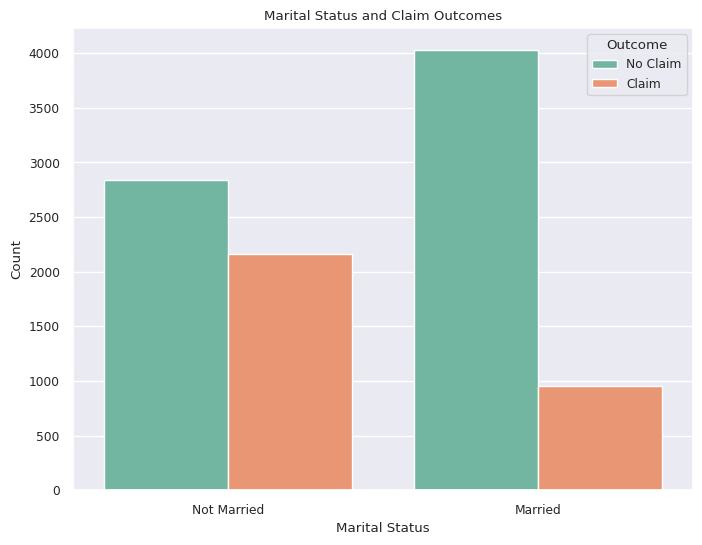

In [69]:
plt.figure(figsize=(8, 6))

sns.countplot(data=CI_df, x='MARRIED', hue='OUTCOME', palette="Set2")
plt.title("Marital Status and Claim Outcomes")
plt.xlabel("Marital Status")
plt.ylabel("Count")

plt.legend(title="Outcome", loc="upper right", labels=["No Claim", "Claim"])
plt.xticks(ticks=[0, 1], labels=["Not Married", "Married"])
plt.show()


The stacked bar chart illustrates the relationship between marital status and claim outcomes. It's evident that married individuals (represented as 'Married')  have fewer insurance claims compared to those who are not married. This means that marital status can be relevant in predicting insurance claim outcomes. Stakeholders may find this information useful when considering marital status as a risk factor in their insurance policies, potentially offering lower premiums or other benefits to married individuals based on their lower claim frequency.

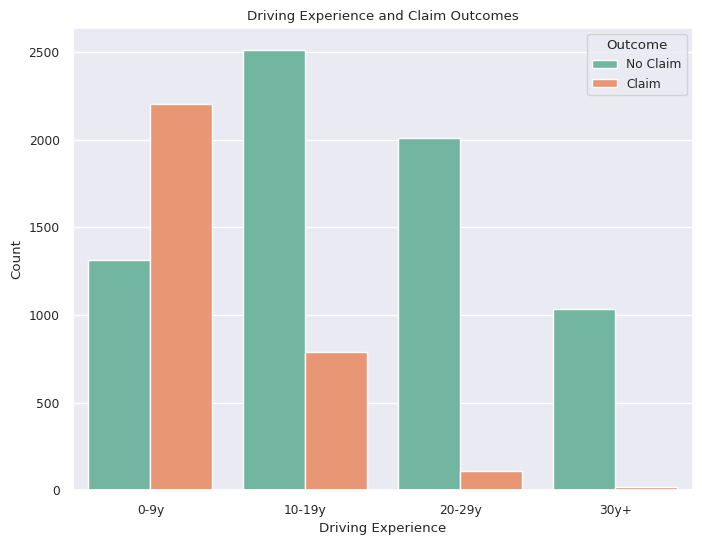

In [70]:
plt.figure(figsize=(8, 6))

sns.countplot(data=CI_df, x='DRIVING_EXPERIENCE', hue='OUTCOME', palette="Set2")
plt.title("Driving Experience and Claim Outcomes")
plt.xlabel("Driving Experience")
plt.ylabel("Count")

plt.legend(title="Outcome", loc="upper right", labels=["No Claim", "Claim"])

plt.show()


Policyholders with 0-9 years of driving experience have the highest number of claims, with a significant portion of them falling into the 'Claim' category. This suggests that individuals with more extensive driving experience tend to have fewer claims, while those with less experience have a higher likelihood of making claims, potentially due to increased risk associated with newer drivers.

#**Stroke Prediction Data**

**Source of data:** Kaggle

**Description of Data:**

Stroke is a significant global health concern, ranking as the second leading cause of death worldwide, accounting for approximately 11% of total deaths, according to the World Health Organization (WHO). This dataset aims to predict the likelihood of a patient experiencing a stroke based on several input parameters, including gender, age, presence of certain medical conditions, and smoking habits. Each row in the dataset provides valuable information about an individual patient's health. The dataset contains 12 features and consists of 5,110 rows of data.

The target variable in this dataset is the "stroke" column. It indicates whether a person has had a stroke or not, with values of 1 representing a stroke occurrence and 0 representing no stroke. The goal of a predictive model using this dataset would typically be to predict whether an individual is at risk of having a stroke based on their demographic and health-related attributes. Therefore, this is a classification problem.

## Data Load

In [71]:
#import the data
Stroke_path = '/content/drive/MyDrive/Coding Dojo/Machine Learning/Project/healthcare-dataset-stroke-data.csv'
Stroke_df = pd.read_csv(Stroke_path)

pd.set_option('display.max_column', None)
Stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [72]:
Stroke_df.shape

(5110, 12)